# Hyperparameter Tuning

This files tests different parameters for the Random Forest classifier, and assess where the validation data reaches a maximum without overfitting. This file additionally outputs performance graphs over the different parameter configurations and outputs the best performances in a file 'hyperparameters.csv'.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [13]:
ethnic_group_names = ['unknown', 'white', 'other', 'asian', 'hispanic_latino', 'black_african_american',
                      'unable_to_obtain', 'american_indian_alaska_native']
path = './data/preprocessing_IV/'

def read_train_val_test(name, path):
    train = pd.read_csv(path + name + '_train.csv')
    # NOTE: drope datetime columns for now, because sklearn does not support it
    train = train.drop(columns=['admittime', 'edregtime', 'emar_charttime', 'lab_charttime'])
    validate = pd.read_csv(path + name + '_validate.csv')
    # NOTE: drope datetime columns for now, because sklearn does not support it
    validate = validate.drop(columns=['admittime', 'edregtime', 'emar_charttime', 'lab_charttime'])
    test = pd.read_csv(path + name + '_test.csv')
    # NOTE: drope datetime columns for now, because sklearn does not support it
    test = test.drop(columns=['admittime', 'edregtime', 'emar_charttime', 'lab_charttime'])
    return train, validate, test

In [14]:
# split features and labels
def splitFeaturesLabels(df):
    X = df.copy()
    X = X.drop('has_kidney_issue', axis=1)
    return X, df.has_kidney_issue

In [15]:
def tune(name, train, val):
    # Initiate empty df to store results
    results = pd.DataFrame({"ethnicity": [], "max_depth":[], "n_estimators":[], "roc_auc":[]})

    X_train, y_train = splitFeaturesLabels(train)
    X_val, y_val = splitFeaturesLabels(val)

    # try different values for max_depth of the individual trees
    for depth in [6, 8, 10, 12, 14, 16, 18, 20]:
        # try different values for the number of trees in a forest
        for estimator in [10, 50, 100, 150, 200, 250, 300]:
            # train classifier
            clf = RandomForestClassifier(n_estimators=estimator, max_depth=depth, random_state=42, n_jobs=-1)
            clf.fit(X_train, y_train)
            # predict labels
            y_pred = clf.predict(X_val)
            # calculate roc_auc
            roc_auc = roc_auc_score(y_val, y_pred)
            # append results to df
            new_result = pd.DataFrame({"ethnicity": name, "max_depth":depth, "n_estimators":estimator, "roc_auc":roc_auc}, index=[0])
            results = pd.concat([results, new_result])
    
    # reset indexing
    results = results.reset_index(drop=True)

    # return
    return results

In [16]:
def getBestParams(df, results):
    return df.append(results.loc[results['roc_auc'].idxmax()])

def tuneEachEthnicity(groups):
    all_results = pd.DataFrame({"ethnicity": [], "max_depth":[], "n_estimators":[], "roc_auc":[]})
    for ethnicity in groups:
        train, val, test = read_train_val_test(ethnicity, path)
        results = tune(ethnicity, train, val)
        all_results = getBestParams(all_results, results)
    return all_results

In [17]:
def runToCSV():
    results = tuneEachEthnicity(ethnic_group_names)
    results.to_csv('hyperparameters.csv', index=False)

runToCSV()

C:\Users\alexa\AppData\Local\Temp\ipykernel_17200\1879989154.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(results.loc[results['roc_auc'].idxmax()])
C:\Users\alexa\AppData\Local\Temp\ipykernel_17200\1879989154.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(results.loc[results['roc_auc'].idxmax()])
C:\Users\alexa\AppData\Local\Temp\ipykernel_17200\1879989154.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(results.loc[results['roc_auc'].idxmax()])
C:\Users\alexa\AppData\Local\Temp\ipykernel_17200\1879989154.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.appen

In [18]:
def tuneOneEthnicity (ethnicity):
    train, val, test = read_train_val_test(ethnicity, path)
    results = tune(ethnicity, train, val)
    return results

Highest roc_auc:
 ethnicity          white
max_depth           20.0
n_estimators        50.0
roc_auc         0.673392
Name: 50, dtype: object


Text(0.5, 0, 'roc_auc')

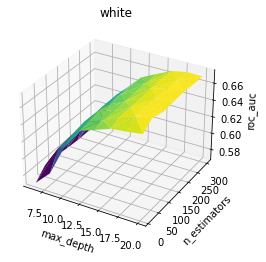

In [19]:
white = tuneOneEthnicity('white')
print("Highest roc_auc:\n", white.loc[white['roc_auc'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(white["max_depth"], white["n_estimators"], white["roc_auc"], cmap='viridis', edgecolor='none')
ax.set_title("white")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("roc_auc")

Highest roc_auc:
 ethnicity          other
max_depth           12.0
n_estimators        10.0
roc_auc         0.637622
Name: 21, dtype: object


Text(0.5, 0, 'roc_auc')

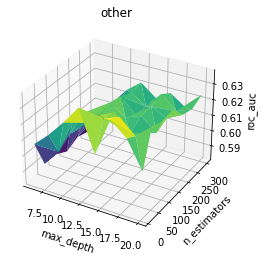

In [20]:
other = tuneOneEthnicity('other')
print("Highest roc_auc:\n", other.loc[other['roc_auc'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(other["max_depth"], other["n_estimators"], other["roc_auc"], cmap='viridis', edgecolor='none')
ax.set_title("other")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("roc_auc")

Highest roc_auc:
 ethnicity          asian
max_depth           14.0
n_estimators        10.0
roc_auc         0.680392
Name: 28, dtype: object


Text(0.5, 0, 'roc_auc')

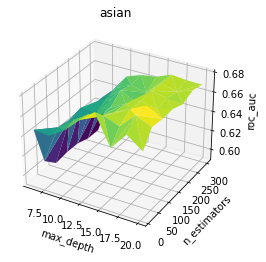

In [21]:
asian = tuneOneEthnicity('asian')
print("Highest roc_auc:\n", asian.loc[asian['roc_auc'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(asian["max_depth"], asian["n_estimators"], asian["roc_auc"], cmap='viridis', edgecolor='none')
ax.set_title("asian")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("roc_auc")

Highest roc_auc:
 ethnicity       hispanic_latino
max_depth                  20.0
n_estimators              100.0
roc_auc                0.706078
Name: 51, dtype: object


Text(0.5, 0, 'roc_auc')

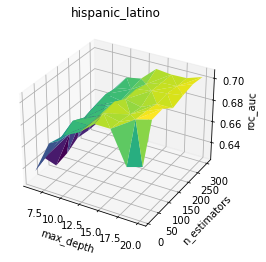

In [22]:
hispanic_latino = tuneOneEthnicity('hispanic_latino')
print("Highest roc_auc:\n", hispanic_latino.loc[hispanic_latino['roc_auc'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(hispanic_latino["max_depth"], hispanic_latino["n_estimators"], hispanic_latino["roc_auc"], cmap='viridis', edgecolor='none')
ax.set_title("hispanic_latino")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("roc_auc")

Highest roc_auc:
 ethnicity       black_african_american
max_depth                         18.0
n_estimators                     100.0
roc_auc                       0.771374
Name: 44, dtype: object


Text(0.5, 0, 'roc_auc')

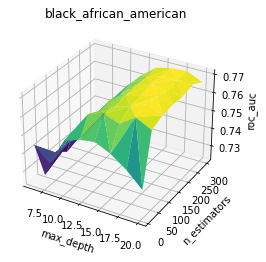

In [23]:
black_african_american = tuneOneEthnicity('black_african_american')
print("Highest roc_auc:\n", black_african_american.loc[black_african_american['roc_auc'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(black_african_american["max_depth"], black_african_american["n_estimators"], black_african_american["roc_auc"], cmap='viridis', edgecolor='none')
ax.set_title("black_african_american")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("roc_auc")

Highest roc_auc:
 ethnicity       unable_to_obtain
max_depth                   10.0
n_estimators                10.0
roc_auc                 0.650599
Name: 14, dtype: object


Text(0.5, 0, 'roc_auc')

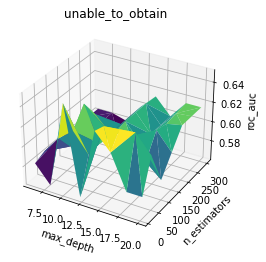

In [24]:
unable_to_obtain = tuneOneEthnicity('unable_to_obtain')
print("Highest roc_auc:\n", unable_to_obtain.loc[unable_to_obtain['roc_auc'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(unable_to_obtain["max_depth"], unable_to_obtain["n_estimators"], unable_to_obtain["roc_auc"], cmap='viridis', edgecolor='none')
ax.set_title("unable_to_obtain")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("roc_auc")

Highest roc_auc:
 ethnicity       american_indian_alaska_native
max_depth                                 8.0
n_estimators                             50.0
roc_auc                              0.680469
Name: 8, dtype: object


Text(0.5, 0, 'roc_auc')

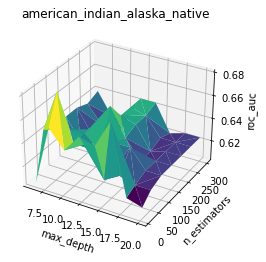

In [25]:
american_indian_alaska_native = tuneOneEthnicity('american_indian_alaska_native')
print("Highest roc_auc:\n", american_indian_alaska_native.loc[american_indian_alaska_native['roc_auc'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(american_indian_alaska_native["max_depth"], american_indian_alaska_native["n_estimators"], american_indian_alaska_native["roc_auc"], cmap='viridis', edgecolor='none')
ax.set_title("american_indian_alaska_native")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("roc_auc")

Highest roc_auc:
 ethnicity        unknown
max_depth           20.0
n_estimators       100.0
roc_auc         0.735216
Name: 51, dtype: object


Text(0.5, 0, 'roc_auc')

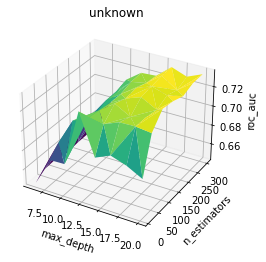

In [26]:
unknown = tuneOneEthnicity('unknown')
print("Highest roc_auc:\n", unknown.loc[unknown['roc_auc'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(unknown["max_depth"], unknown["n_estimators"], unknown["roc_auc"], cmap='viridis', edgecolor='none')
ax.set_title("unknown")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("roc_auc")